In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
tune = pd.read_csv('tune.csv')

In [3]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season',
       'crimes_per_year', 'prev_crimes_per_year', 'primary_type_grouped'],
      dtype='object')

[Text(0, 0, 'False'), Text(1, 0, 'True')]

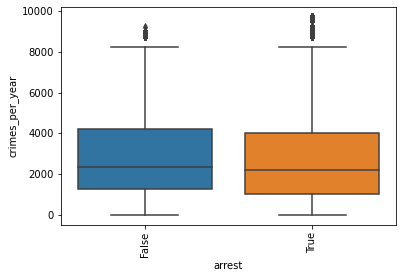

In [9]:
ax = sns.boxplot(y='crimes_per_year', x='arrest', data=train)
ax.set_xticklabels(labels=train.arrest.value_counts().index, rotation=90)

[Text(0, 0, 'False'), Text(1, 0, 'True')]

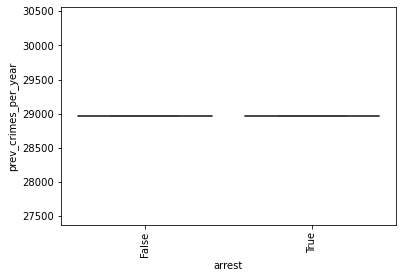

In [11]:
ax = sns.boxplot(y='prev_crimes_per_year', x='arrest', data=train)
ax.set_xticklabels(labels=train.arrest.value_counts().index, rotation=90)

In [12]:
train.prev_crimes_per_year.describe()

count    352581.0
mean      28969.0
std           0.0
min       28969.0
25%       28969.0
50%       28969.0
75%       28969.0
max       28969.0
Name: prev_crimes_per_year, dtype: float64

In [7]:
train.primary_type_grouped.unique()

array(['NON-CRIMINAL_ASSAULT', 'THEFT', 'OTHER_OFFENSE',
       'NARCOTIC_OFFENSE', 'SEXUAL_OFFENSE', 'CRIMINAL_OFFENSE',
       'WEAPONS_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE'], dtype=object)

In [3]:
def plot_cat_var(labels, sizes, title, num_values, xaxis):
    labels = list(labels)
    sizes = list(sizes)
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
    
    print(len(labels))
    print(len(sizes))
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_ylabel('count')
    ax.set_xlabel(xaxis)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    #plt.figure(figsize=(20,10))
    #plt.savefig(title)

In [4]:
def plot_numerical_variables_distribution(data, variable, title):
    ax = sns.distplot(data[variable])
    ax.set_title(title)
    ax.set_xlabel(variable)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.savefig(title)

In [5]:
def pie_chart(labels, sizes, title, num_values):
    labels = list(labels)
    sizes = list(sizes)
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    plt.pie(sizes, labels=labels, autopct='%1.0f%%')
    plt.title = title
    plt.show() 

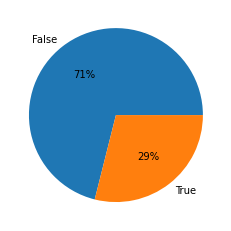

In [6]:
pie_chart(train.arrest.value_counts().index, train.arrest.value_counts(), 'Training Arrest Breakdown', len(train.arrest.unique()))
#plot_cat_var(train.arrest.value_counts().index, train.arrest.value_counts(), 'Training Arrest Breakdown', len(train.arrest.value_counts()),'Arrested')

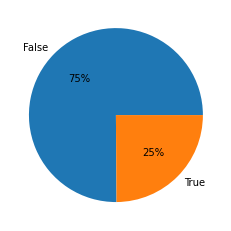

In [7]:
pie_chart(tune.arrest.value_counts().index, tune.arrest.value_counts(), 'Tune Arrest Breakdown', len(tune.arrest.unique()))

There is a slight difference between the label breakdown between the two datasets, close enough to be considered IID

In [8]:
len(list(train.district.value_counts())[:10])

10

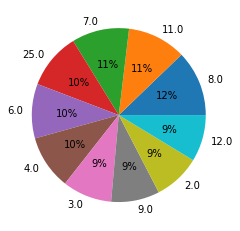

In [9]:
pie_chart(train.district.value_counts().index[:10], train.district.value_counts()[:10], 'Training District Breakdown', len(train.district.unique()))


Just a basic rundown of the features in the data

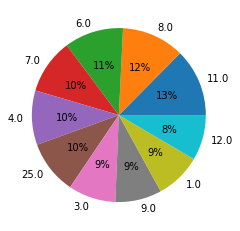

In [10]:
pie_chart(tune.district.value_counts().index[:10], tune.district.value_counts()[:10], 'Tune District Breakdown', len(tune.district.unique()))

Similar data distributions amongst the different datasets 

10
10


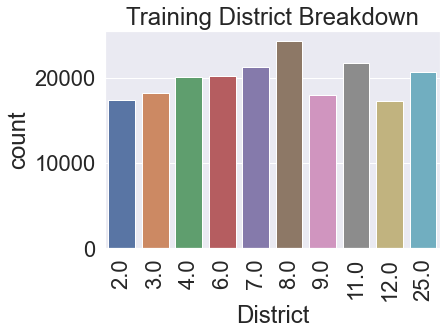

In [11]:
plot_cat_var(train.district.value_counts().index[:10], train.district.value_counts()[:10], 'Training District Breakdown', len(train.district.unique()), 'District')
# labels, sizes, title, num_values, xaxis

10
10


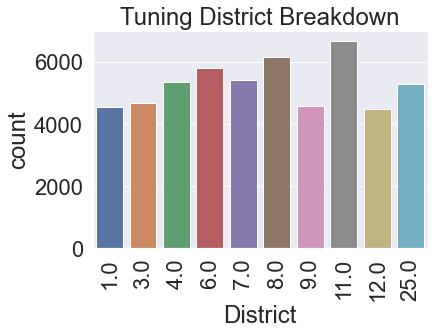

In [12]:
plot_cat_var(tune.district.value_counts().index[:10], tune.district.value_counts()[:10], 'Tuning District Breakdown', len(tune.district.unique()), 'District')


In [13]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season',
       'crimes_per_year', 'prev_crimes_per_year', 'primary_type_grouped'],
      dtype='object')

10
10


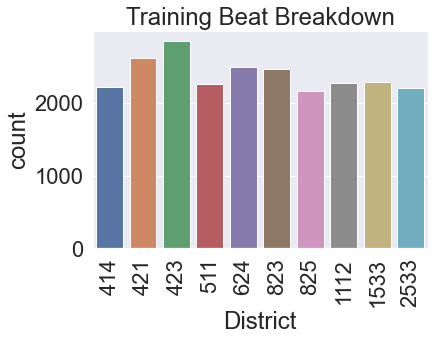

In [14]:
plot_cat_var(train.beat.value_counts().index[:10], train.beat.value_counts()[:10], 'Training Beat Breakdown', len(train.beat.unique()), 'District')

10
10


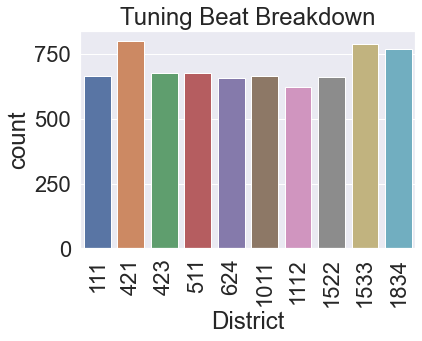

In [15]:
plot_cat_var(tune.beat.value_counts().index[:10], tune.beat.value_counts()[:10], 'Tuning Beat Breakdown', len(tune.beat.unique()), 'District')

10
10


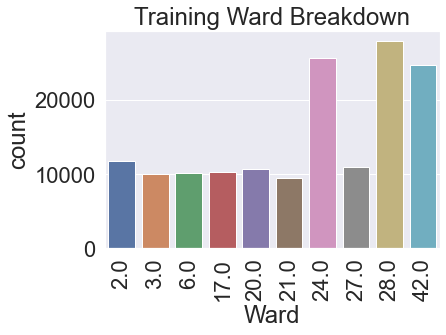

In [16]:
plot_cat_var(train.ward.value_counts().index[:10], train.ward.value_counts()[:10], 'Training Ward Breakdown', len(train.ward.unique()), 'Ward')

10
10


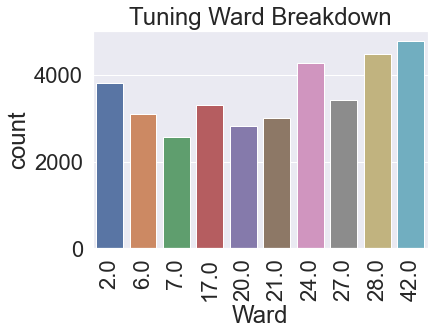

In [17]:
plot_cat_var(tune.ward.value_counts().index[:10], tune.ward.value_counts()[:10], 'Tuning Ward Breakdown', len(tune.ward.unique()), 'Ward')

Still kind of similar between training and tuning datasets

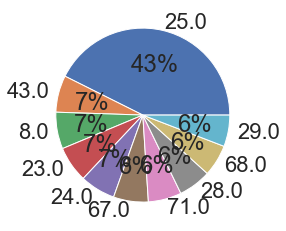

In [18]:
pie_chart(train.community_area.value_counts().index[:10], train.community_area.value_counts()[:10], 'Training Community Area Breakdown', len(train.community_area.unique()))

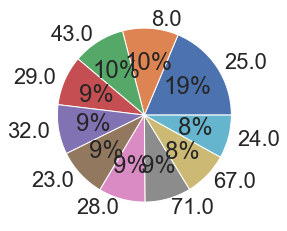

In [19]:
pie_chart(tune.community_area.value_counts().index[:10], tune.community_area.value_counts()[:10], 'Tuning Community Area Breakdown', len(tune.community_area.unique()))

This is not iid in terms of the community area, but all this really tells us since the data is split based on year, that over time Community Area 25, crime has gone down in that area

In [20]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season',
       'crimes_per_year', 'prev_crimes_per_year', 'primary_type_grouped'],
      dtype='object')

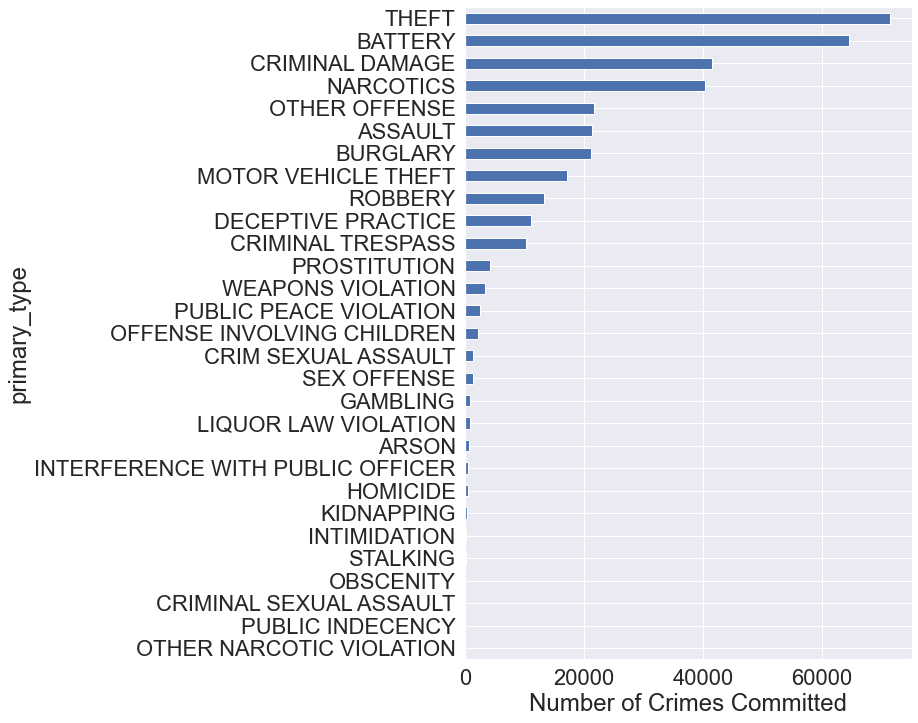

In [21]:
plt.figure(figsize = (8,12))
train.groupby(train['primary_type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

<Figure size 720x360 with 0 Axes>

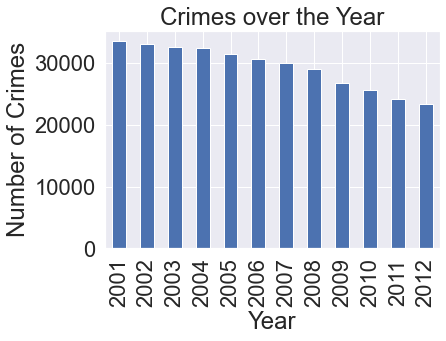

In [22]:
plt.figure(figsize = (10,5))
fig, ax = plt.subplots() 
x=train.groupby([train.year]).size().plot.bar()
ax.set_xlabel('Year')
ax.set_title("Crimes over the Year")  
ax.set_ylabel('Number of Crimes') 
#plt.ylabel('Number of Crimes Acts')
plt.show()

<Figure size 720x360 with 0 Axes>

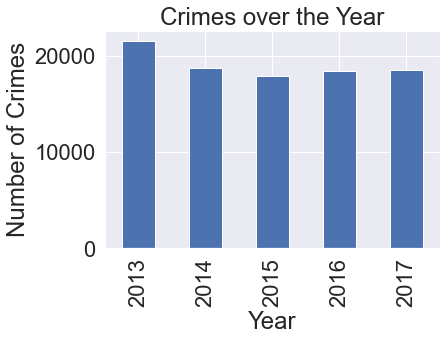

In [23]:
plt.figure(figsize = (10,5))
fig, ax = plt.subplots() 
x=tune.groupby([tune.year]).size().plot.bar()
ax.set_xlabel('Year')
ax.set_title("Crimes over the Year")  
ax.set_ylabel('Number of Crimes') 
#plt.ylabel('Number of Crimes Acts')
plt.show()

<Figure size 720x360 with 0 Axes>

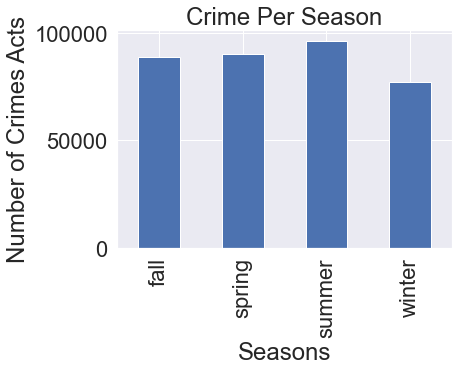

In [24]:
plt.figure(figsize = (10,5))
fig, ax = plt.subplots() 
train.groupby([train.season]).size().plot.bar()
ax.set_title('Crime Per Season')
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Crimes Acts')
plt.show()

<Figure size 720x360 with 0 Axes>

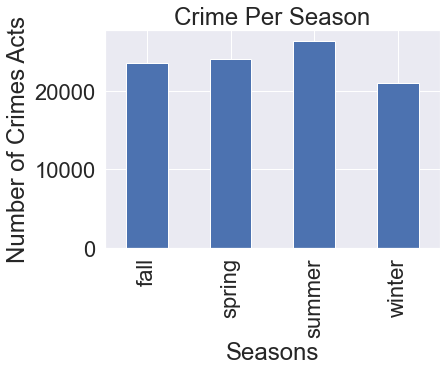

In [25]:
plt.figure(figsize = (10,5))
fig, ax = plt.subplots() 
tune.groupby([tune.season]).size().plot.bar()
ax.set_title('Crime Per Season')
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Crimes Acts')
plt.show()

Slightly more crimes happen in the summer in both datasets, overall it doesnt seem like season dictates how many crimes happen

In [26]:
Crime_Data_district = train.pivot_table('arrest', aggfunc = np.sum, columns = ['district'], 
                                         index = train.date, fill_value = 0)
Crime_Data_ward = train.pivot_table('arrest', aggfunc = np.sum, columns = ['ward'], 
                                         index = train.date, fill_value = 0)
Crime_Data_ca = train.pivot_table('arrest', aggfunc = np.sum, columns = ['community_area'], 
                                         index = train.date, fill_value = 0)

In [43]:
arrest_per_year = train.groupby('year')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,arrest,Counts,Percentage
year,,,
2001,False,23688,70.649289
2001,True,9841,29.350711
2002,False,23419,70.955916
2002,True,9586,29.044084
2003,False,22917,70.418510
2003,True,9627,29.581490
2004,False,22495,69.450448
2004,True,9895,30.549552
2005,False,21696,69.023001


In [45]:
arrest_per_year = tune.groupby('year')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year


,arrest,Counts,Percentage
year,,,
2013,False,15431,71.662100
2013,True,6102,28.337900
2014,False,13227,70.626869
2014,True,5501,29.373131
2015,False,13221,73.642288
2015,True,4732,26.357712
2016,False,14764,79.995665
2016,True,3692,20.004335
2017,False,14852,80.194384


<Figure size 720x360 with 0 Axes>

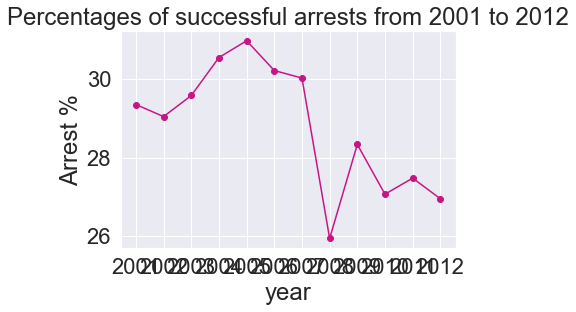

In [44]:
line_plot = arrest_per_year[arrest_per_year['arrest'] == True]['Percentage']
plt.figure(figsize = (10,5))
## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig, ax=plt.subplots()
ax.set_title('Percentages of successful arrests from 2001 to 2012')
ax.set_xlabel("Year")
ax.set_ylabel("Arrest %")
plt.xticks(line_plot.index, line_plot.index.values, rotation='vertical')

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.show()

<Figure size 720x360 with 0 Axes>

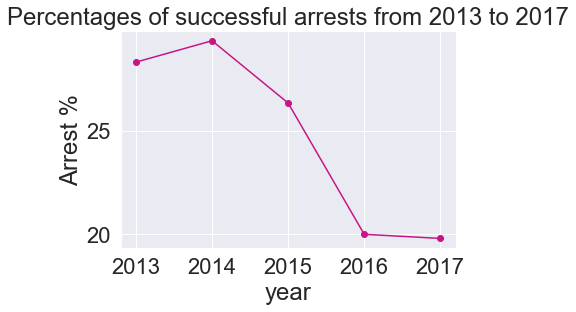

In [46]:
line_plot = arrest_per_year[arrest_per_year['arrest'] == True]['Percentage']
plt.figure(figsize = (10,5))
## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig, ax=plt.subplots()
ax.set_title('Percentages of successful arrests from 2013 to 2017')
ax.set_xlabel("Year")
ax.set_ylabel("Arrest %")
plt.xticks(line_plot.index, line_plot.index.values, rotation='vertical')

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.show()

In [52]:
arrest_per_season = train.groupby('season')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_season['Percentage'] = (100 * arrest_per_season / arrest_per_season.groupby(level=0).sum())
arrest_per_season.reset_index(level=[1],inplace=True)

In [54]:
arrest_per_season

,arrest,Counts,Percentage
season,,,
fall,False,63561,71.706904
fall,True,25079,28.293096
spring,False,63609,70.508230
spring,True,26606,29.491770
summer,False,69762,72.331204
summer,True,26686,27.668796
winter,False,53684,69.468672
winter,True,23594,30.531328


<Figure size 720x360 with 0 Axes>

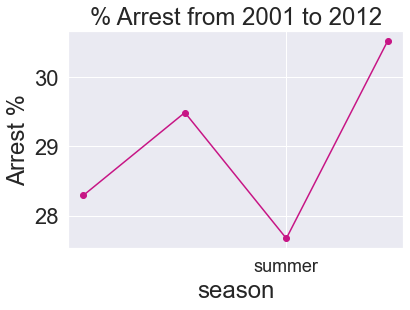

In [62]:
line_plot = arrest_per_season[arrest_per_season['arrest'] == True]['Percentage']
plt.figure(figsize = (10,5))
labels = line_plot.index.values
fig, ax=plt.subplots()
x = np.arange(2,10,2)
x_ticks_labels = ['fall','spring','summer','winter']
ax.set_title('% Arrest from 2001 to 2012')
ax.set_xlabel("Season")
ax.set_ylabel("Arrest %")
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

#plt.xticks(line_plot.index, line_plot.index.values, rotation='vertical')
line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.show()

In [63]:
arrest_per_season = tune.groupby('season')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_season['Percentage'] = (100 * arrest_per_season / arrest_per_season.groupby(level=0).sum())
arrest_per_season.reset_index(level=[1],inplace=True)

<Figure size 720x360 with 0 Axes>

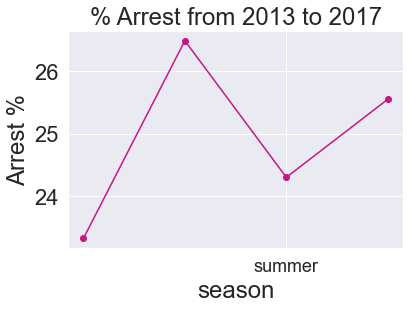

In [64]:
line_plot = arrest_per_season[arrest_per_season['arrest'] == True]['Percentage']
plt.figure(figsize = (10,5))
labels = line_plot.index.values
fig, ax=plt.subplots()
x = np.arange(2,10,2)
x_ticks_labels = ['fall','spring','summer','winter']
ax.set_title('% Arrest from 2013 to 2017')
ax.set_xlabel("Season")
ax.set_ylabel("Arrest %")
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

#plt.xticks(line_plot.index, line_plot.index.values, rotation='vertical')
line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.show()

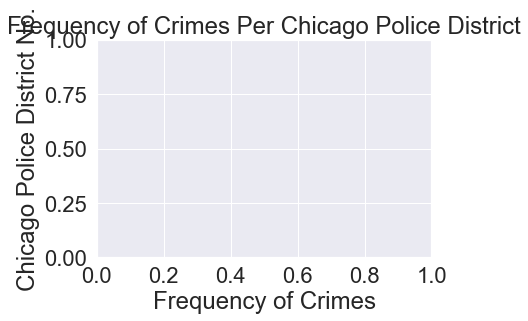

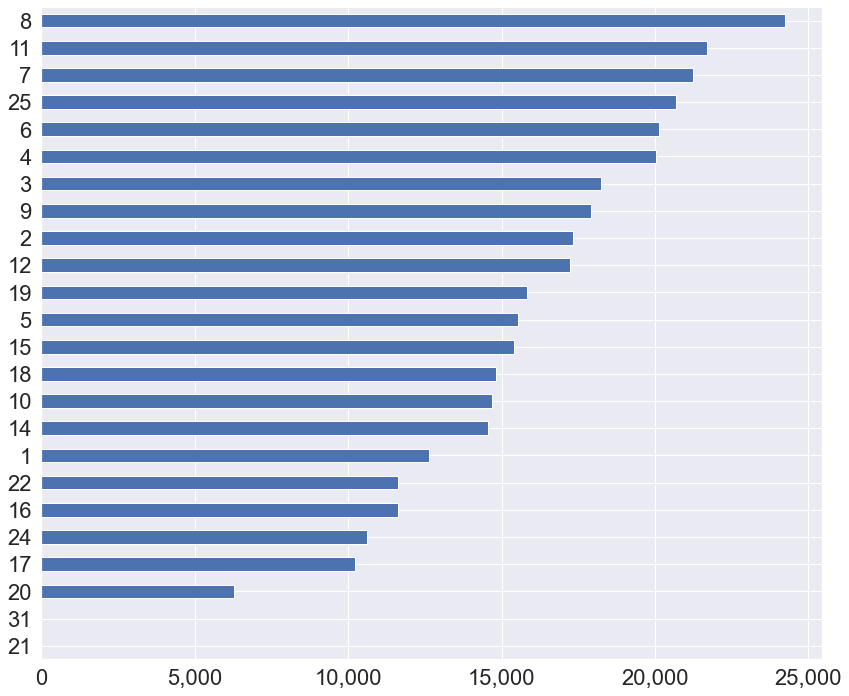

In [68]:
# calculating total number of incidents per district
district_crime = train['district'].value_counts(ascending=True)
fig, ax=plt.subplots()
## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
ax.set_title("Frequency of Crimes Per Chicago Police District")
ax.set_xlabel("Frequency of Crimes")
ax.set_ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

<Figure size 1008x864 with 0 Axes>

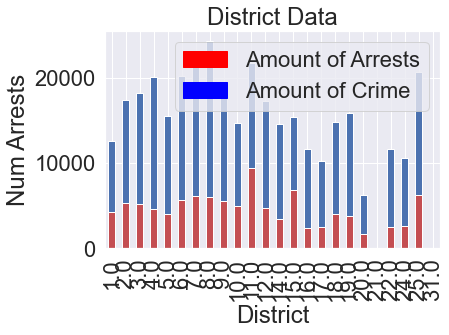

In [71]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')
fig=plt.figure(figsize=(14, 12))
fig, ax=plt.subplots()
#crime per district
#plt.figure(figsize = (8,5))
#plt.hold(True)
train.groupby(train['district']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
ax.set_title('District Data')
ax.set_xlabel('District')
ax.set_ylabel('Num Arrests')

plt.legend(handles=[red, blue])
#plt.hold(False)

There are too many districts and wards to keep track of to make sense of that data, so we choose to leave those out

In [73]:
train.dtypes

unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                float64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
DateTime                 object
time                     object
day                       int64
month                     int64
season                   object
crimes_per_year           int64
prev_crimes_per_year      int64
primary_type_grouped     object
dtype: object

In [78]:
len(train.location_description.unique())

129

In [79]:
len(tune.location_description.unique())

122

In [83]:
len(train.description.unique())

317

In [84]:
len(tune.description.unique())

297

In [85]:
len(train.primary_type.unique())

29

In [81]:
for description in train.description.unique():
    print(description)

DOMESTIC BATTERY SIMPLE
FORCIBLE ENTRY
OVER $500
ARMED: HANDGUN
OTHER WEAPONS VIOLATION
VEHICLE TITLE/REG OFFENSE
SIMPLE
VIOLATE ORDER OF PROTECTION
SOLICIT NARCOTICS ON PUBLICWAY
$500 AND UNDER
SOLICIT FOR BUSINESS
AUTOMOBILE
TO PROPERTY
POSS: CANNABIS 30GMS OR LESS
FRAUD OR CONFIDENCE GAME
TO VEHICLE
TO LAND
ATTEMPT THEFT
AGGRAVATED OF A SENIOR CITIZEN
FALSE/STOLEN/ALTERED TRP
FROM BUILDING
NON-AGGRAVATED
SOLICIT ON PUBLIC WAY
TELEPHONE THREAT
POSS: CRACK
ILLEGAL CONSUMPTION BY MINOR
PURSE-SNATCHING
TO STATE SUP LAND
AGG: HANDS/FIST/FEET NO/MINOR INJURY
POSS: HEROIN(WHITE)
MANU/DELIVER:CRACK
TO RESIDENCE
CALL OPERATION
UNLAWFUL ENTRY
HARASSMENT BY TELEPHONE
AGGRAVATED: OTHER DANG WEAPON
AGGRAVATED
PRO EMP HANDS NO/MIN INJURY
UNLAWFUL POSS OF HANDGUN
THEFT OF LABOR/SERVICES
BOMB THREAT
STRONGARM - NO WEAPON
ILLEGAL USE CASH CARD
RETAIL THEFT
AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON
AGG CRIM SEX ABUSE FAM MEMBER
AGGRAVATED VEHICULAR HIJACKING
OBSTRUCTING JUSTICE
AGGRAVATED DOMEST

In [86]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season',
       'crimes_per_year', 'prev_crimes_per_year', 'primary_type_grouped'],
      dtype='object')

C:\Users\NikhilGaur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='domestic', ylabel='arrest'>

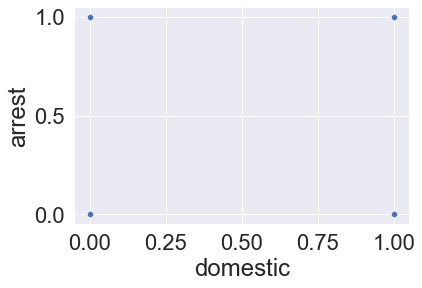

In [89]:
sns.scatterplot(train.domestic, train.arrest)

In [13]:
arrest = train[train['arrest'] == True]
n_arrest = train[train['arrest'] == False]

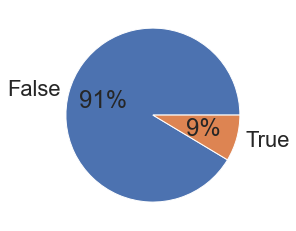

In [19]:
#plot_cat_var(labels, sizes, title, num_values, xaxis)
pie_chart(arrest.domestic.value_counts().index, arrest.domestic.value_counts(), "Domestic Distribution for arrests", 2)

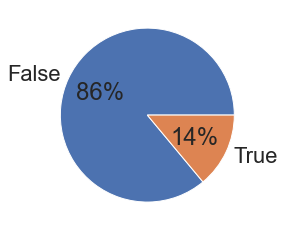

In [20]:
pie_chart(n_arrest.domestic.value_counts().index, n_arrest.domestic.value_counts(), "Domestic Distribution for Non Arrests", 2)

Almost twice as likely to be arrested if there is not a domestic crime, interesting

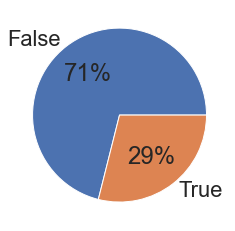

In [97]:
n_arrest
pie_chart(train.arrest.value_counts().index, train.arrest.value_counts(), "Domestic Distribution for arrests", 2)

In [8]:
train.primary_type.value_counts()

THEFT                               71517
BATTERY                             64608
CRIMINAL DAMAGE                     41458
NARCOTICS                           40377
OTHER OFFENSE                       21706
ASSAULT                             21356
BURGLARY                            21198
MOTOR VEHICLE THEFT                 17131
ROBBERY                             13218
DECEPTIVE PRACTICE                  11101
CRIMINAL TRESPASS                   10253
PROSTITUTION                         4161
WEAPONS VIOLATION                    3326
PUBLIC PEACE VIOLATION               2428
OFFENSE INVOLVING CHILDREN           2203
CRIM SEXUAL ASSAULT                  1267
SEX OFFENSE                          1242
GAMBLING                              874
LIQUOR LAW VIOLATION                  824
ARSON                                 600
INTERFERENCE WITH PUBLIC OFFICER      546
HOMICIDE                              403
KIDNAPPING                            366
INTIMIDATION                      

In [14]:
tr_homicide = train[train['primary_type'] == 'HOMICIDE']

In [16]:
tr_homicide.district.value_counts()

11.0    40
7.0     32
10.0    30
4.0     28
8.0     28
3.0     27
15.0    24
6.0     24
2.0     22
5.0     21
12.0    19
25.0    19
9.0     18
22.0    13
17.0    10
24.0     9
18.0     8
14.0     8
19.0     7
1.0      6
16.0     5
20.0     5
Name: district, dtype: int64

In [15]:
tr_homicide

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,longitude,location,DateTime,time,day,month,season,crimes_per_year,prev_crimes_per_year,primary_type_grouped
1252,3075,HL237605,2005-03-16,013XX E 69TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,-87.593535,"(41.769896519, -87.593535274)",2005-03-16 13:40:00+00:00,13:40:00,16,3,spring,35,28969,CRIMINAL_OFFENSE
2011,19557,HS469995,2010-08-19,010XX W ARDMORE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,-87.656106,"(41.987343957, -87.656105817)",2010-08-19 02:57:00+00:00,02:57:00,19,8,summer,2,28969,CRIMINAL_OFFENSE
2684,2454,HJ713612,2003-10-23,004XX W 60TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,-87.636448,"(41.784413196, -87.636447538)",2003-10-23 19:33:00+00:00,19:33:00,23,10,fall,51,28969,CRIMINAL_OFFENSE
3181,4945,HR207222,2009-03-09,116XX S CHURCH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,-87.670414,"(41.682292438, -87.670413714)",2009-03-09 23:00:00+00:00,23:00:00,9,3,spring,19,28969,CRIMINAL_OFFENSE
6900,1219,G687062,2001-11-15,017XX W STUEBEN STREET,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,-87.664803,"(41.687120159, -87.664802953)",2001-11-15 09:40:00+00:00,09:40:00,15,11,fall,18,28969,CRIMINAL_OFFENSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350783,2053,HJ240298,2003-03-15,077XX S COLFAX AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,-87.561441,"(41.754616453, -87.561441152)",2003-03-15 20:20:00+00:00,20:20:00,15,3,spring,44,28969,CRIMINAL_OFFENSE
351495,19354,HS269432,2010-04-21,023XX W 36TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,...,-87.683100,"(41.82847996, -87.683099884)",2010-04-21 21:05:00+00:00,21:05:00,21,4,spring,29,28969,CRIMINAL_OFFENSE
351513,2160,HJ368546,2003-05-17,087XX S JUSTINE ST,0110,HOMICIDE,FIRST DEGREE MURDER,VACANT LOT,True,False,...,-87.661831,"(41.73522457, -87.661831252)",2003-05-17 01:50:00+00:00,01:50:00,17,5,spring,21,28969,CRIMINAL_OFFENSE
351581,2506,HJ774668,2003-11-22,054XX W THOMAS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,-87.761713,"(41.900358565, -87.761713484)",2003-11-22 09:20:00+00:00,09:20:00,22,11,fall,31,28969,CRIMINAL_OFFENSE


In [11]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season',
       'crimes_per_year', 'prev_crimes_per_year', 'primary_type_grouped'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt

(array([65504., 85760., 63522., 42420., 31892., 31293., 16349.,  9371.,
         2777.,  3693.]),
 array([1.0000e+00, 9.7330e+02, 1.9456e+03, 2.9179e+03, 3.8902e+03,
        4.8625e+03, 5.8348e+03, 6.8071e+03, 7.7794e+03, 8.7517e+03,
        9.7240e+03]),
 <BarContainer object of 10 artists>)

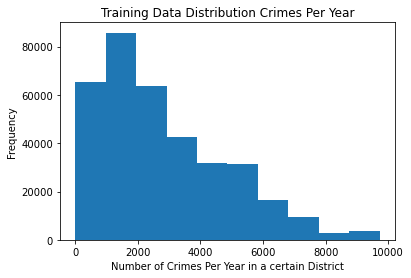

In [19]:
fig, ax=plt.subplots()
ax.set_xlabel("Number of Crimes Per Year in a certain District")
ax.set_ylabel("Frequency")
ax.set_title("Training Data Distribution Crimes Per Year")
plt.hist(train.crimes_per_year)

In [21]:
x = train.crimes_per_year

In [22]:
iqr = np.subtract(*np.percentile(x, [75, 25]))

In [23]:
iqr

2962.0

In [24]:
train.corr()

,unique_key,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude,day,month,crimes_per_year,prev_crimes_per_year
unique_key,1.000000,-0.023248,0.022143,-0.014979,-0.000736,-0.101937,0.111315,-0.002970,-1.501777e-02,0.991876,-1.496129e-02,-0.003280,5.636590e-03,0.073168,-0.151304,NaN
arrest,-0.023248,1.000000,-0.073567,-0.014232,-0.013421,-0.012127,-0.015420,-0.033162,1.399100e-02,-0.021224,1.408320e-02,-0.033357,1.531518e-03,-0.020276,-0.022937,NaN
domestic,0.022143,-0.073567,1.000000,-0.035457,-0.032072,-0.038896,0.064350,-0.000658,-6.942994e-02,0.024013,-6.924150e-02,-0.001717,-4.796694e-03,-0.010117,0.074229,NaN
beat,-0.014979,-0.014232,-0.035457,1.000000,0.920032,0.567836,-0.468850,-0.460540,6.140211e-01,-0.015953,6.141568e-01,-0.457956,1.599769e-03,0.002711,-0.099771,NaN
district,-0.000736,-0.013421,-0.032072,0.920032,1.000000,0.625889,-0.457011,-0.531008,6.225238e-01,-0.001373,6.229183e-01,-0.529340,5.959782e-04,0.003762,-0.099810,NaN
ward,-0.101937,-0.012127,-0.038896,0.567836,0.625889,1.000000,-0.536720,-0.395626,5.621560e-01,-0.103472,5.621650e-01,-0.392883,-2.407836e-03,-0.015992,-0.025192,NaN
community_area,0.111315,-0.015420,0.064350,-0.468850,-0.457011,-0.536720,1.000000,0.229292,-6.871872e-01,0.112748,-6.861870e-01,0.222347,1.538080e-03,0.013539,-0.006986,NaN
x_coordinate,-0.002970,-0.033162,-0.000658,-0.460540,-0.531008,-0.395626,0.229292,1.000000,-4.035255e-01,-0.003043,-4.049857e-01,0.999783,8.902715e-04,-0.000093,0.012318,NaN
y_coordinate,-0.015018,0.013991,-0.069430,0.614021,0.622524,0.562156,-0.687187,-0.403525,1.000000e+00,-0.016239,9.999933e-01,-0.401663,9.918700e-07,0.001903,-0.036932,NaN
year,0.991876,-0.021224,0.024013,-0.015953,-0.001373,-0.103472,0.112748,-0.003043,-1.623887e-02,1.000000,-1.618876e-02,-0.003309,4.303853e-04,-0.006253,-0.156160,NaN


In [25]:
arrested = train[train['arrest'] == True]

In [28]:
n_arrested = train[train['arrest'] == False]

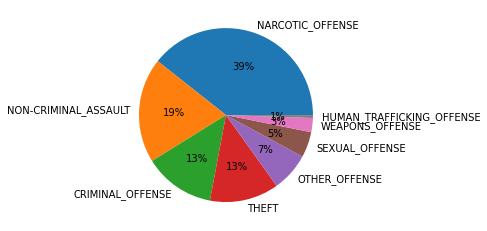

In [27]:
pie_chart(arrested.primary_type_grouped.value_counts().index, arrested.primary_type_grouped.value_counts(), 'Arrested Primary Type Breakdown', len(arrested.primary_type.unique()))


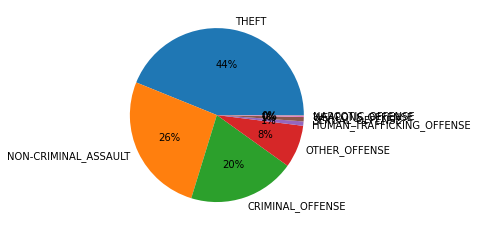

In [29]:
pie_chart(n_arrested.primary_type_grouped.value_counts().index, n_arrested.primary_type_grouped.value_counts(), 'Arrested Primary Type Breakdown', len(n_arrested.primary_type.unique()))


In [30]:
train.primary_type_grouped.value_counts()

THEFT                        123064
NON-CRIMINAL_ASSAULT          85964
CRIMINAL_OFFENSE              63215
NARCOTIC_OFFENSE              40381
OTHER_OFFENSE                 27211
SEXUAL_OFFENSE                 6851
WEAPONS_OFFENSE                3326
HUMAN_TRAFFICKING_OFFENSE      2569
Name: primary_type_grouped, dtype: int64

2
2


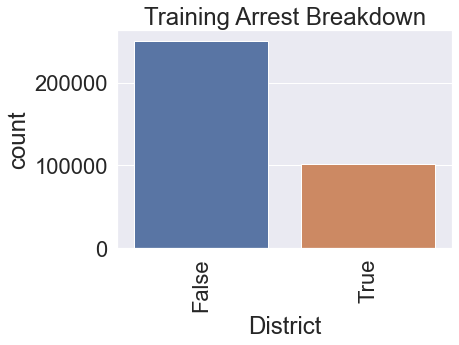

In [31]:
plot_cat_var(train.arrest.value_counts().index[:10], train.arrest.value_counts()[:10], 'Training Arrest Breakdown', len(train.district.unique()), 'District')


8
8


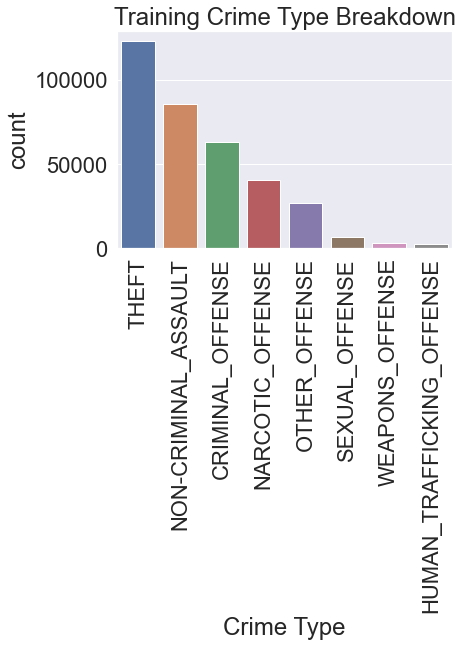

In [32]:
plot_cat_var(train.primary_type_grouped.value_counts().index[:10], train.primary_type_grouped.value_counts()[:10], 'Training Crime Type Breakdown', len(train.primary_type_grouped.unique()), 'Crime Type')
